In [2]:
!pip install optuna
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna
import matplotlib.pyplot as plt


  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/4c/6a/219a431aaf81b3eb3070fd2d58116baa366d3072f43bbcc87dc3495b7546/optuna-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/95/df/520663eb7f7a329f7c585834b754bcc3cbcc03957d85fcbba4a2a723ad9d/colorlog-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/24/3b/11fe92d68c6a42468ddab0cf03f454419b0788fff4e91ba46b8bebafeffd/Mako-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#print(pd.DataFrame(X_train))

In [7]:
y_train_binary = [1 if y==0 else 0 for y in y_train]
y_test_binary = [1 if y==0 else 0 for y in y_test]

Best parameters for RandomForestClassifier:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}


/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/s

Best parameters for LogisticRegression:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 206.913808111479}


[I 2024-01-15 08:47:23,705] Trial 5 finished with value: 0.631578947368421 and parameters: {'C': 0.0031464205342100165, 'gamma': 6.6249821301909355}. Best is trial 3 with value: 0.935672514619883.
/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_1575/3351471949.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_1575/3351471949.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
[I 2024-01-15 08:47:23,741] Trial 6 finished with value: 0.631578947368421 and parameters: {'C': 0.03026598665744689, 'gamma': 

Best parameters for SVC:  {'C': 0.7360618558905919, 'gamma': 0.00048338186358465784}
Accuracy of RandomForestClassifier: 0.04093567251461988


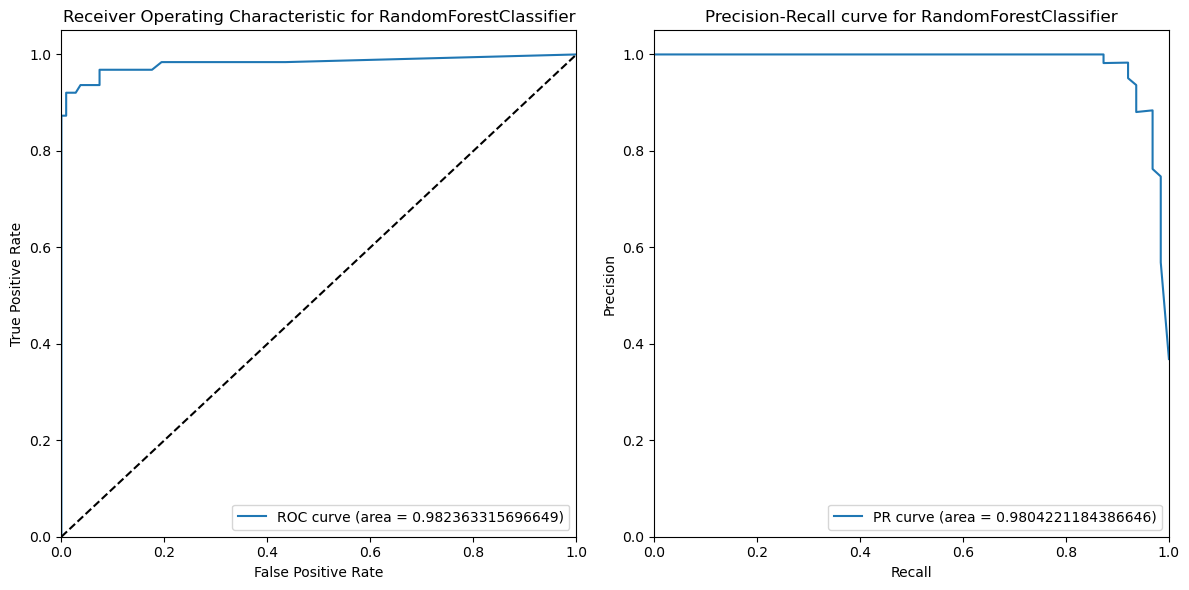

Accuracy of LogisticRegression: 0.03508771929824561


/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


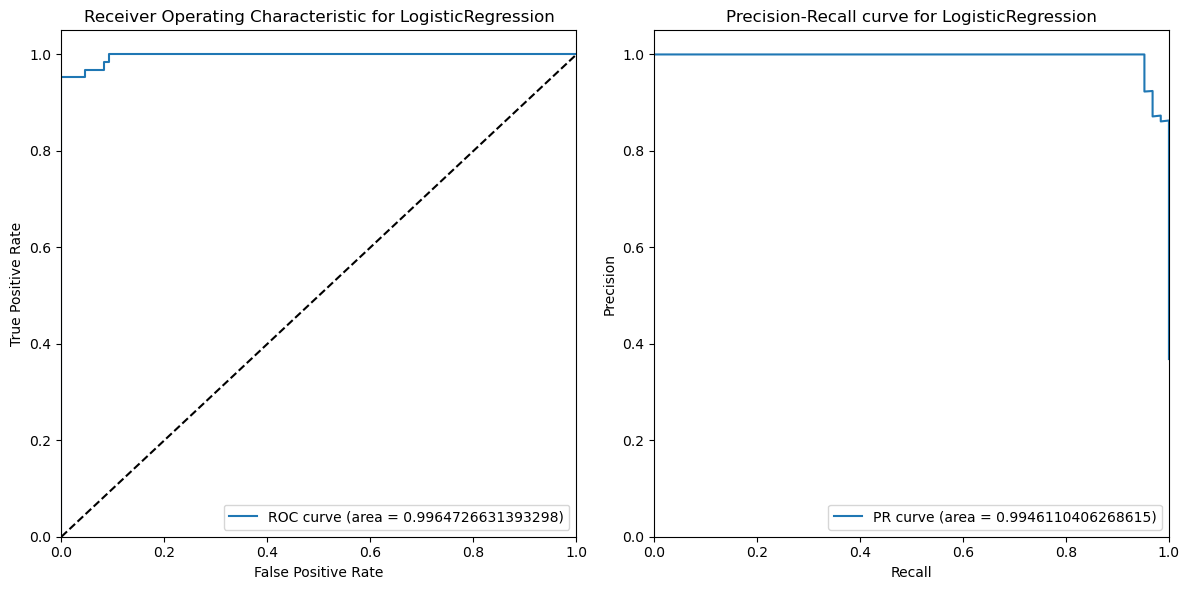

Accuracy of SVC: 0.04093567251461988


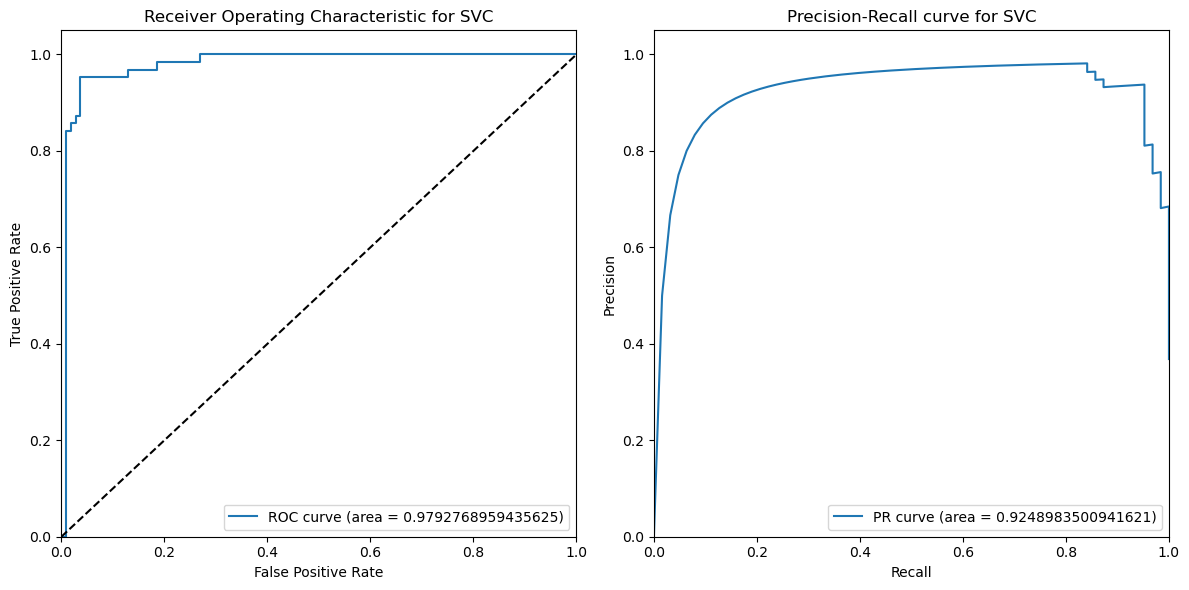

In [10]:
# Set the parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_binary)

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

# Set the parameters for random search
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1'],
    'solver': ['liblinear']
}

# Initialize a LogisticRegression
lr = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_binary)

# Get the best parameters
best_params = random_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4)
    
    svm = SVC(C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X_train, y_train_binary)
    predictions = svm.predict(X_test)
    
    return accuracy_score(y_test_binary, predictions)

# Run optuna optimization
## We create an Optuna study object and call the optimize method to run the optimization process.
##The direction='maximize' argument specifies that we are maximizing the objective function (accuracy score).
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print('Best parameters for SVC: ', best_params)

def plot_curves_and_print_accuracy(model, model_name):
    # Fit the model and predict probabilities
    model.fit(X_train, y_train_binary)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Calculate PR curve and AUC
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    pr_auc = average_precision_score(y_test_binary, y_pred_proba)

    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {accuracy}')
    
    # Plot ROC curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")

    # Plot PR curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

# Apply the function on our models with best hyperparameters
plot_curves_and_print_accuracy(RandomForestClassifier(**grid_search.best_params_, random_state=42), 'RandomForestClassifier')
plot_curves_and_print_accuracy(LogisticRegression(**random_search.best_params_, random_state=42), 'LogisticRegression')
plot_curves_and_print_accuracy(SVC(**study.best_params, probability=True, random_state=42), 'SVC')
    